Fusing layers... 


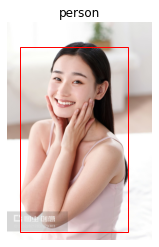

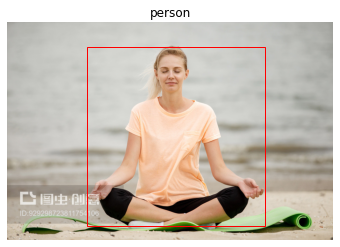

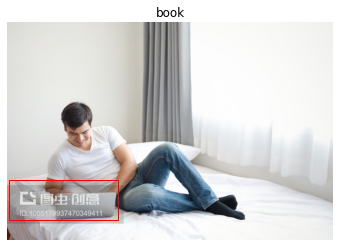

In [2]:
%matplotlib inline
import dave
import matplotlib.pyplot as plt
from PIL import Image
from dave.neural_network.model.YOLO.model_predict import predict as yolo_predict

coco_class_names = [ 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
         'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
         'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
         'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
         'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
         'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
         'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
         'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
         'hair drier', 'toothbrush' ]

yolo_model = '/project/model/pretrained_model/YOLOv5/yolov5s'
image_path = '/project/dataset/Private/renwei/mediapipe'

def _one_picture_show(image_name, title, bboxes):
    plt.figure()
    image_data = Image.open(image_name)
    ax = plt.subplot(1, 1, 1)
    if bboxes != None:
        for box in bboxes:
            rect = plt.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], fill=False, edgecolor = 'red',linewidth=1)
            ax.add_patch(rect)
    plt.title(title)
    plt.axis('off')
    plt.imshow(image_data)
    image_data.close()
    plt.show()
    plt.close()
    return


def yolo_model_debug(yolo_model, image_path):
    yolo = yolo_predict(yolo_model)
    
    file_list, file_number = dave.t_path_file_list(image_path)
    for file_name in file_list:
        file_size, bboxes, scores, classs = yolo.predict(file_name)
        if bboxes != None:
            _one_picture_show(file_name, coco_class_names[classs[0]], bboxes)
        else:
            _one_picture_show(file_name, file_name, None)
    return

yolo_model_debug(yolo_model, image_path)